<a href="https://colab.research.google.com/github/JeanAlmeida1/DEX-day8/blob/main/Clusteriza%C3%A7%C3%A3o_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Objetivo: Clusterizar os passageiros do dataset titanic através do método KMeans e do MeanShift, e visualizar a distribuição dos clusters criados via PCA.  

In [98]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.cluster import KMeans, MeanShift

## ETAPA 1: Estruturação dos dados

In [99]:
df = pd.read_csv('train.csv')

In [100]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [101]:
df.shape

(891, 12)

In [102]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [103]:
# Dados nulos
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [104]:
# Dropando variáveis que não serão úteis
df = df.drop(columns=['Cabin','PassengerId', 'Name', 'Ticket'])

In [105]:
# Preenchendo idade NA pela média
df['Age'] = df['Age'].fillna(np.mean(df['Age']))

In [106]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [107]:
# Preenchendo Embarked    
df['Embarked'] = df['Embarked'].fillna('Q')

In [108]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [109]:
df['Pclass'] = df['Pclass'].astype('category')
df.dtypes

Survived       int64
Pclass      category
Sex           object
Age          float64
SibSp          int64
Parch          int64
Fare         float64
Embarked      object
dtype: object

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


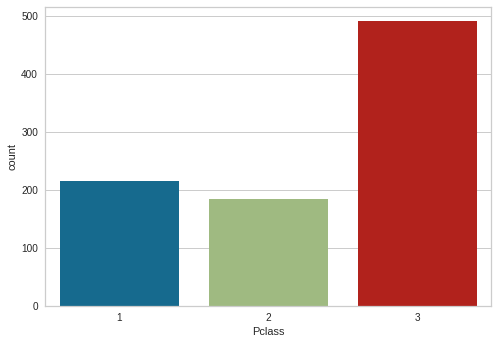

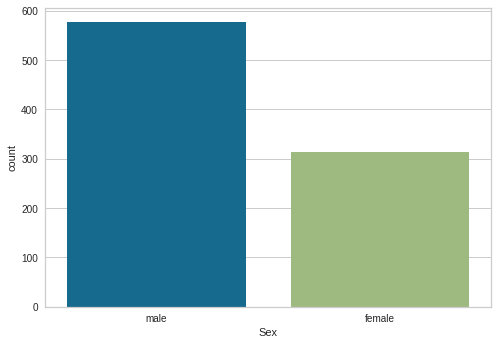

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


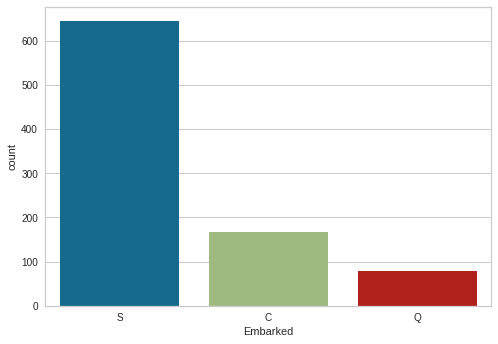

In [110]:
# Plotando gráfico de barras nas variáveis que serão transformadas via one hot encoding

to_encode = ["Pclass","Sex","Embarked"]

for cat in to_encode:
  sns.countplot(df[cat])
  plt.show()

In [111]:
to_encode1 = ["Pclass", "Embarked"]
for cat in to_encode1:
  df[pd.get_dummies(df[cat]).columns] =  pd.get_dummies(df[cat], prefix=cat, prefix_sep='_') 

In [112]:
# Transformando sex em binária: female = 1 

df['Sex'] = df['Sex'].replace({'male':0, 'female':1})

In [113]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,1,2,3,C,Q,S
0,0,3,0,22.0,1,0,7.2500,S,0,0,1,0,0,1
1,1,1,1,38.0,1,0,71.2833,C,1,0,0,1,0,0
2,1,3,1,26.0,0,0,7.9250,S,0,0,1,0,0,1
3,1,1,1,35.0,1,0,53.1000,S,1,0,0,0,0,1
4,0,3,0,35.0,0,0,8.0500,S,0,0,1,0,0,1


In [114]:
# Dropando variáveis que foram dummyficadas

df = df.drop(columns=['Pclass', 'Embarked'])

In [115]:
df = df.rename(columns={1:'Pclass_1', 2:'Pclass_2', 3:'Pclass_3', 'C':'Embarked_C', 'Q':'Embarked_Q', 'S':'Embarked_S'})

In [116]:
df.columns

Index(['Survived', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Pclass_1',
       'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [117]:
# Removendo outliers
df1 = df[df['Age'] < df['Age'].quantile(.99)]
df1 = df1[df1['Parch'] < df['Parch'].quantile(.99)]
df1 = df1[df1['Fare'] < df['Fare'].quantile(.99)]

In [118]:
df = df1.copy()

In [119]:
df.describe()

,Survived,Sex,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
count,862.000000,862.000000,862.000000,862.000000,862.000000,862.000000,862.000000,862.000000,862.000000,862.000000,862.000000,862.000000
mean,0.386311,0.350348,29.079366,0.516241,0.324826,28.974158,0.233179,0.211137,0.555684,0.185615,0.088167,0.726218
std,0.487186,0.477356,12.268836,1.106035,0.654697,36.899397,0.423101,0.408352,0.497178,0.389021,0.283702,0.446157
min,0.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,22.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,29.699118,0.000000,0.000000,13.931250,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,1.000000,34.000000,1.000000,0.000000,30.053100,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,64.000000,8.000000,3.000000,247.520800,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## ETAPA 2: Análise do dataset

In [120]:
df.describe(percentiles=[0.01, 0.25, 0.5, 0.75, 0.9, 0.99, 0.995])

,Survived,Sex,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
count,862.000000,862.000000,862.000000,862.000000,862.000000,862.000000,862.000000,862.000000,862.000000,862.000000,862.000000,862.000000
mean,0.386311,0.350348,29.079366,0.516241,0.324826,28.974158,0.233179,0.211137,0.555684,0.185615,0.088167,0.726218
std,0.487186,0.477356,12.268836,1.106035,0.654697,36.899397,0.423101,0.408352,0.497178,0.389021,0.283702,0.446157
min,0.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,22.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,29.699118,0.000000,0.000000,13.931250,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,1.000000,34.000000,1.000000,0.000000,30.053100,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
90%,1.000000,1.000000,46.000000,1.000000,1.000000,76.187530,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
99%,1.000000,1.000000,61.000000,5.000000,2.000000,211.337500,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


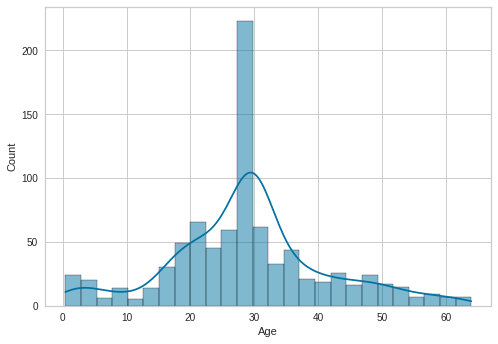

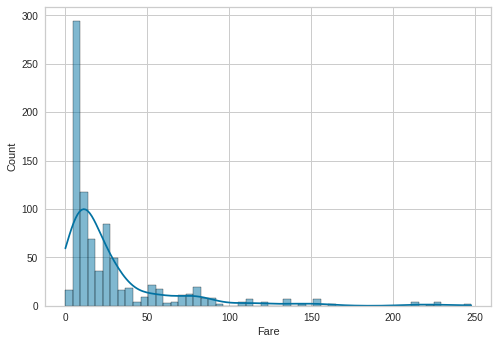

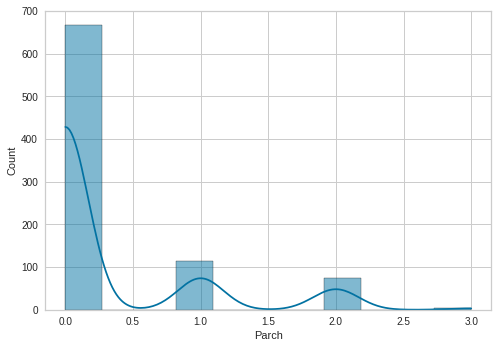

In [121]:
#Plotando histogramas 

num_variaveis = ['Age', 'Fare', 'Parch']

for num in num_variaveis:
  sns.histplot(df[num], kde=True)
  plt.show()

In [122]:
from sklearn.preprocessing import StandardScaler 

Scaler = StandardScaler()
df_scaled = Scaler.fit_transform(df)

**PCA**

In [123]:
from sklearn.decomposition import PCA

In [124]:
X = df_scaled

pca = PCA(n_components=2)
pca_components = pca.fit_transform(X)

In [125]:
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.23590983 0.16551658]
[49.39889948 41.37757283]


In [126]:
df_pca = pd.DataFrame(data = pca_components, columns = ['principal component 1', 'principal component 2'])

In [127]:
df_pca.head()

,principal component 1,principal component 2
0,-1.805615,0.024126
1,3.789882,1.274816
2,-0.483737,-0.047682
3,2.165425,-0.976089
4,-1.616340,0.072071


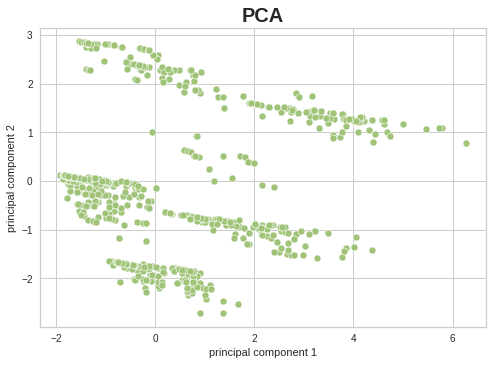

In [128]:
plt.figure()
plt.title('PCA', fontweight='bold', fontsize=20)
sns.scatterplot(data=df_pca, x = 'principal component 1', y = 'principal component 2', color='g')

## Clusterização

In [129]:
# Método de Elbow

from sklearn.cluster import KMeans

ks = range(2, 15)
all_inertia = []

for k in ks:
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(df_scaled)
  all_inertia.append(kmeans.inertia_)

(array([2000., 3000., 4000., 5000., 6000., 7000., 8000., 9000.]),
 <a list of 8 Text major ticklabel objects>)

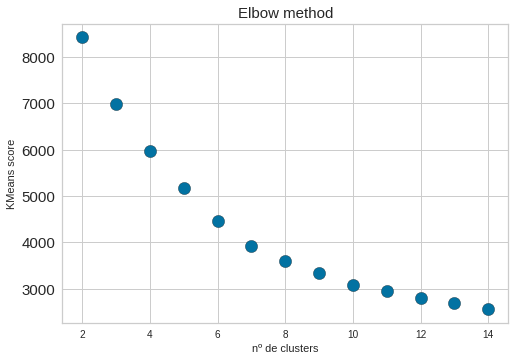

In [130]:
plt.figure()
plt.scatter(x=ks, y=all_inertia, s=150, edgecolor='k')
plt.grid(True)
plt.title('Elbow method', fontsize=15)
plt.xlabel('nº de clusters')
plt.ylabel('KMeans score')
plt.yticks(fontsize=15)

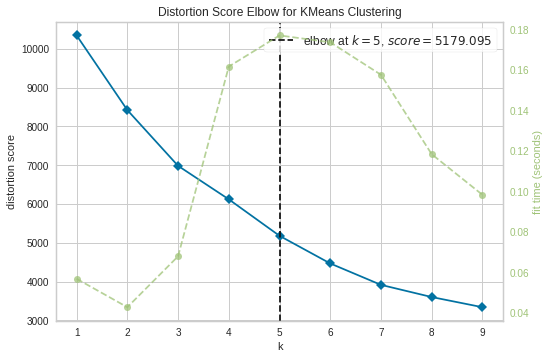

In [131]:
from yellowbrick.cluster import KElbowVisualizer
kmeans = KMeans()
kmeans.fit(df_scaled)
visualizer = KElbowVisualizer(kmeans, k=(1,10))
visualizer.fit(df_scaled)
visualizer.show()

In [140]:
# KMEANS 

clt_kmeans = KMeans(n_clusters=5).fit(df_scaled)
label = clt_kmeans.predict(df_scaled)

In [141]:
df_pca['cluster_Kmeans'] = label

In [142]:
df_pca.head()

,principal component 1,principal component 2,cluster_Kmeans,cluster_ms
0,-1.805615,0.024126,1,0
1,3.789882,1.274816,2,0
2,-0.483737,-0.047682,1,0
3,2.165425,-0.976089,2,0
4,-1.616340,0.072071,1,0


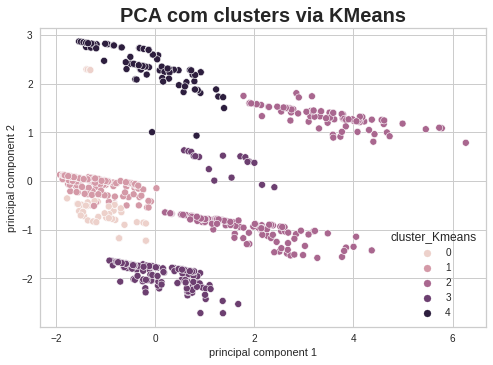

In [143]:
plt.title('PCA com clusters via KMeans', fontsize=20, fontweight='bold')
sns.scatterplot(data=df_pca, x='principal component 1', y='principal component 2', hue='cluster_Kmeans')

In [152]:
len(set(label_ms))

395

In [161]:
# Usando MeanShift
clt_ms = MeanShift(bandwidth=3.5, cluster_all=False, n_jobs=-1).fit(df_scaled)
label_ms = clt_ms.predict(df_scaled)
clusters_ms = set(label_ms)
print('Quantidade de clusters:', len(clusters_ms))

Quantidade de clusters: 5


In [154]:
df_pca['cluster_ms'] = label_ms

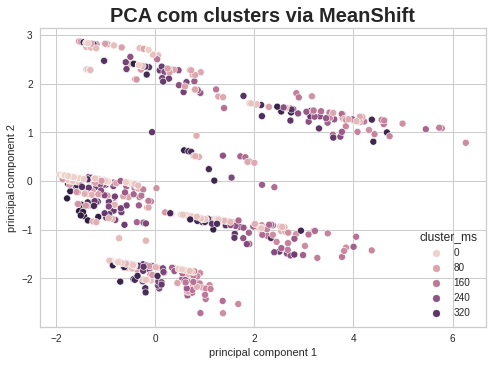

In [155]:
plt.title('PCA com clusters via MeanShift', fontsize=20, fontweight='bold')
sns.scatterplot(data=df_pca, x='principal component 1', y='principal component 2', hue='cluster_ms')

Informações

In [162]:
df['cluster_kmeans'] = label
df['cluster_ms'] = label_ms

In [163]:
df.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,cluster_kmeans,cluster_ms
0,0,0,22.0,1,0,7.2500,0,0,1,0,0,1,1,0
1,1,1,38.0,1,0,71.2833,1,0,0,1,0,0,2,1
2,1,1,26.0,0,0,7.9250,0,0,1,0,0,1,1,0
3,1,1,35.0,1,0,53.1000,1,0,0,0,0,1,2,1
4,0,0,35.0,0,0,8.0500,0,0,1,0,0,1,1,0


In [166]:
df.groupby('cluster_kmeans').mean()

,Survived,Sex,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,cluster_ms
cluster_kmeans,,,,,,,,,,,,,
0,0.085106,0.446809,14.199775,4.127660,1.702128,37.297166,0.0,0.000000,1.000000,0.000000,0.085106,0.914894,2.382979
1,0.205980,0.202658,27.537060,0.215947,0.136213,10.856211,0.0,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
2,0.636816,0.442786,36.345241,0.373134,0.298507,73.582026,1.0,0.000000,0.000000,0.383085,0.019900,0.597015,0.661692
3,0.474860,0.413408,29.289504,0.413408,0.391061,20.915037,0.0,1.000000,0.000000,0.094972,0.000000,0.905028,0.067039
4,0.402985,0.425373,26.583244,0.276119,0.216418,10.606409,0.0,0.022388,0.977612,0.492537,0.507463,0.000000,1.171642


In [169]:
df.groupby('cluster_ms').mean()

,Survived,Sex,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,cluster_kmeans
cluster_ms,,,,,,,,,,,,,
0,0.291118,0.254934,29.029544,0.345395,0.243421,17.302363,0.125000,0.274671,0.600329,0.082237,0.000000,0.917763,1.865132
1,0.792208,0.655844,31.995458,0.480519,0.512987,79.216936,0.785714,0.077922,0.136364,0.714286,0.000000,0.285714,2.350649
2,0.426471,0.500000,28.959658,0.205882,0.058824,10.016607,0.000000,0.044118,0.955882,0.000000,1.000000,0.000000,4.000000
3,0.750000,0.750000,44.250000,0.750000,0.000000,85.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000
4,0.071429,0.321429,12.246208,5.142857,1.750000,44.119643,0.000000,0.000000,1.000000,0.000000,0.142857,0.857143,0.000000
